# Udacity : In-depth exploration of Boston’s Airbnb market trends [CRISP-DM]

* Cross-industry standard process for data mining, known as CRISP-DM, it is an open standard process model that describes common approaches used by data mining experts. It is the most widely-used analytics model.
* In 2015, IBM released a new methodology called Analytics Solutions Unified Method for Data Mining/Predictive Analytics(also known as ASUM-DM) which refines and extends CRISP-DM. 
* CRISP-DM breaks the process of data mining into major phases:

        Business Understanding
        Data Understanding
        Data Preparation
        Modeling
        Evaluation
        Deployment
        
We will follow with this sequence to acheive our goals.


`Data set acquired : `
* listings.csv 
* reviews.csv
* calendar.csv

## 1. Business Understanding

Boston AirBnB Dataset contains listings, reviews and booking dates of Boston area, reviews for each of the listings also the date availability for each listings. Analyzing the data set we try to answer our business questions.

Questions to enquire while analyzing the AirBnB data set : 

    1. How to attain the best deal price on AirBNB?
    2. How to gain better reviews?
    3. Is it possile to make an accurate predictive model for listing price based on machine leraning


## 2. Data Understanding

Begining with the analysis of the data set

In [1]:
# import important libraries
from datetime import date
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

# A simplifying sentiment analysis tool using VADER in Python to provide sentiment scores on Social Media Text.
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# import data sets
df_listings = pd.read_csv("listings.csv", index_col=None)
df_reviews = pd.read_csv("reviews.csv", index_col=None)
df_calendar = pd.read_csv("calendar.csv", index_col=None)

In [3]:
# check column data types
def check_dtype(x):
    '''
    the function will print the columns with their respective data types.
    
    '''
    list_col = list(x)
    list_dtype = list(x.dtypes)
    for i, (col, dtype) in enumerate(zip(list_col, list_dtype)):
        print('{:<8}{:<50}{}'.format(i,col,dtype))


In [4]:
# check for null values and percentage count
def check_null(x):
    '''
    the function will print the count of null values in different columns.
    
    '''
    list_col = list(x)
    for i in list_col:
        print('{:<50}'.format(i) , '{:<10}'.format(sum(x[i].isna())), " : " , '{0:.2f}'.format( round(sum((x[i].isna())/len(x))*100, 2)),'%')

### listings.csv

In [5]:
#listings.csv
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [6]:
#shape of data set
df_listings.shape

(3585, 95)

In [7]:
#check column data types
check_dtype(df_listings)

0       id                                                int64
1       listing_url                                       object
2       scrape_id                                         int64
3       last_scraped                                      object
4       name                                              object
5       summary                                           object
6       space                                             object
7       description                                       object
8       experiences_offered                               object
9       neighborhood_overview                             object
10      notes                                             object
11      transit                                           object
12      access                                            object
13      interaction                                       object
14      house_rules                                       object
15      thumbnail_url      

In [8]:
#check for null values
check_null(df_listings)

id                                                 0           :  0.00 %
listing_url                                        0           :  0.00 %
scrape_id                                          0           :  0.00 %
last_scraped                                       0           :  0.00 %
name                                               0           :  0.00 %
summary                                            143         :  3.99 %
space                                              1057        :  29.48 %
description                                        0           :  0.00 %
experiences_offered                                0           :  0.00 %
neighborhood_overview                              1415        :  39.47 %
notes                                              1975        :  55.09 %
transit                                            1290        :  35.98 %
access                                             1489        :  41.53 %
interaction                                   

#### Observations
* The data set contains 3585 data points and 95 columns(variables).
* After observing the duplicate, we observe and examine the columns carefull and perform further operations furter. 
* There are many columns with more than 90% null values, so it's wise to remove them.

### reviews.csv

In [9]:
#reviews.csv
df_reviews.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [10]:
# shape of data set
df_reviews.shape

(68275, 6)

In [11]:
#check column data types
check_dtype(df_reviews)

0       listing_id                                        int64
1       id                                                int64
2       date                                              object
3       reviewer_id                                       int64
4       reviewer_name                                     object
5       comments                                          object


In [12]:
#check for null values
check_null(df_reviews)

listing_id                                         0           :  0.00 %
id                                                 0           :  0.00 %
date                                               0           :  0.00 %
reviewer_id                                        0           :  0.00 %
reviewer_name                                      0           :  0.00 %
comments                                           53          :  0.08 %


#### Observations
* The data set contains 68275 rows of data and 6 columns.
* Columns `listing_id` and `date` have more than 90% duplicates, will examine it. Columns `reviewer_id` and `reviewer_name` is not mandatory so i'll be removing them too.
* In `comments` column there are 53 null in a data set of 68275 data, which contributes to 0.08%, there i'll be removing the null value rows.

### calendar.csv

In [13]:
#calendar.csv
df_calendar.head(10)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


In [14]:
# shape of data set
df_calendar.shape

(1308890, 4)

In [15]:
#check column data types
check_dtype(df_calendar)

0       listing_id                                        int64
1       date                                              object
2       available                                         object
3       price                                             object


In [16]:
#check for null values
check_null(df_calendar)

listing_id                                         0           :  0.00 %
date                                               0           :  0.00 %
available                                          0           :  0.00 %
price                                              665853      :  50.87 %


#### Observations
* The data set contains 1308890 rows of data and 4 columns.
* Column `listing_id` has 99.73% dupicate values therefor we must check for the value counts.
* Column `date` has more than 90% duplicates, will check for it.
* Columns `price` has 99.90% duplicates and 50.87% null values.

## 3. Data Preparation

### Cleaning

In [17]:
def remove_null(x):
    '''
    This function removes the columns with more than 90% null values in it.
    '''
    for i in list(x):
        if ((x[i].isna().sum() / len(x[i])) > 0.90 ):
            print(i)
            x.drop([i], axis=1, inplace=True)


In [18]:
# Get overview of how many unique values a column has.
def remove_unique(x):
    '''
    This function checks for each and every column where only single value exists in the whole column 
    and then drop the whole column.
    '''
    
    uni = x.nunique()
    uniq = pd.DataFrame({'variable':uni.index, 'unique_values':uni.values})
    for i,j in uniq.iterrows():
        if j['unique_values'] == 1:
            print([j.variable])
            x.drop([j.variable], axis = 1, inplace = True)

## `listings.csv`

##### Check for columns with more than 90% null values

In [19]:
# data set listings.csv
remove_null(df_listings)

neighbourhood_group_cleansed
square_feet
has_availability
license
jurisdiction_names


In [20]:
df_listings.shape

(3585, 90)

* Now the listings data set column has been redused to 90. 

##### Check for the columns with only 1 single data to remove

In [21]:
# data set reviews.csv
remove_unique(df_listings)

['scrape_id']
['last_scraped']
['experiences_offered']
['state']
['country_code']
['country']
['calendar_last_scraped']
['requires_license']


In [22]:
df_listings.shape

(3585, 82)

* Now the listings data set column has been redused to 82.

##### Remove unwanted columns which could not be further used in the project for the analysis.

In [23]:
# remove columns in listings
rem_list = ['listing_url','host_is_superhost','thumbnail_url','medium_url', 'picture_url','xl_picture_url',
            'host_url','host_name','host_location','host_about','street','host_thumbnail_url','host_picture_url',
            'host_verifications','city','zipcode','market','smart_location','latitude','longitude','is_location_exact',
            'calendar_updated','first_review','last_review','require_guest_profile_picture','host_neighbourhood',
            'require_guest_phone_verification','calculated_host_listings_count','weekly_price','monthly_price',
            'name','summary', 'space', 'description', 'neighborhood_overview', 'notes','transit','access','interaction']
            
for i in rem_list:
    df_listings.drop([i], axis =1, inplace = True)

In [24]:
df_listings.shape

(3585, 43)

In [25]:
df_listings[['host_listings_count','host_total_listings_count']].describe()

,host_listings_count,host_total_listings_count
count,3585.000000,3585.000000
mean,58.902371,58.902371
std,171.119663,171.119663
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,7.000000,7.000000
max,749.000000,749.000000


In [26]:
# fixing column "host_listings_count" and "host_total_listing_count" since both the columns have exact same values.
# As we can see from the above data all the stat values like mean, std, min,.. are the same. Hence remove it.

if len(df_listings[df_listings['host_listings_count'] == df_listings['host_total_listings_count']]) == len(df_listings):
    df_listings.drop(['host_total_listings_count'], axis = 1, inplace = True)
    


In [27]:
# check for columns where `neighbourhood` and `neighbourhood_cleansed` values are not same. Carefully oberving
# the we can safely drop the `neighbourhood` column since `neighbourhood_cleansed` provided the exact values.
len(df_listings[df_listings['neighbourhood'] != df_listings['neighbourhood_cleansed']])

1462

In [28]:
# neighbourhood_cleansed was more accurate data therefor we dump the neighbourhood column.
df_listings.drop(['neighbourhood'], axis =1 , inplace = True)

In [29]:
df_listings.shape

(3585, 41)

* Now the total number of rows and columns are 3585 and 41 respectively.

##### Convert columns with date value to datetime type

In [30]:
# listing out the date columns and converting their data type to date format.
df_listings['host_since'] =  pd.to_datetime(df_listings['host_since'])

##### Convert columns with boolean type data to bool values (0/1)

In [31]:
# change column data type to string
df_listings['instant_bookable'] = df_listings['instant_bookable'].astype(str)
df_listings['host_has_profile_pic'] = df_listings['host_has_profile_pic'].astype(str)
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].astype(str)

In [32]:
# check for columns whoe values are boolean type ( true / false ) - "t" / "f" and convert them to 1 and 0 for true 
# and false respectively.

df_listings['instant_bookable'] = df_listings['instant_bookable'].str.replace('t','1').str.replace('f','0')
df_listings['host_has_profile_pic'] = df_listings['host_has_profile_pic'].str.replace('t','1').str.replace('f','0')
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].str.replace('t','1').str.replace('f','0')

In [33]:
# convert data type to integer
df_listings['instant_bookable'] = df_listings['instant_bookable'].astype(np.int64)
df_listings['host_has_profile_pic'] = df_listings['host_has_profile_pic'].astype(np.int64)
df_listings['host_identity_verified'] = df_listings['host_identity_verified'].astype(np.int64)

##### Convert selective columns into integer data type

In [34]:
# Selecting columns which had numerial issues with it , such as the currency columns included $ sign, % sign too.

for i in ['host_response_rate','host_acceptance_rate','price','security_deposit','cleaning_fee','extra_people']:
    df_listings[i] = df_listings[i].str.replace('%','').str.replace('$','').str.replace(',','')

In [35]:
# converting columns to float data type
for i in ['host_response_rate', 'host_acceptance_rate','price','security_deposit','cleaning_fee','extra_people']:
    df_listings[i] = pd.to_numeric(df_listings[i])

In [36]:
#Few of the columns should be in natural(countable) number form so we first of all replace the null values with 
#0 and convert these columns to integer form

for i in ['bathrooms','bedrooms','beds']:
    df_listings[i] = df_listings[i].fillna(0).astype(np.int64)
    

##### Check `room_type` column data.

In [37]:
# check unique values of column bed_type and their counts.
df_listings['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [38]:
# add unique values as a new column to the data frame
df_listings['room_type_entire_home_apt'] = df_listings.room_type.str.contains('Entire home/apt', case=False).astype(np.int64)
df_listings['room_type_private_room'] = df_listings.room_type.str.contains('Private room', case=False).astype(np.int64)
df_listings['room_type_shared_room'] = df_listings.room_type.str.contains('Shared room', case=False).astype(np.int64)

##### Check `bed_type` column data.

In [39]:
# check unique values of column bed_type and their counts.
df_listings['bed_type'].value_counts()

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

In [40]:
# add unique values as a new column to the data frame
df_listings['bed_type_real_bed'] = df_listings.bed_type.str.contains('Real Bed', case=False).astype(np.int64)
df_listings['bed_type_futon'] = df_listings.bed_type.str.contains('Futon', case=False).astype(np.int64)
df_listings['bed_type_airbed'] = df_listings.bed_type.str.contains('Airbed', case=False).astype(np.int64)
df_listings['bed_type_pullout_sofa'] = df_listings.bed_type.str.contains('Pull-out Sofa', case=False).astype(np.int64)
df_listings['bed_type_couch'] = df_listings.bed_type.str.contains('Couch', case=False).astype(np.int64)

##### Check `property_type` column data.

In [41]:
# check unique values of column property_type and their counts.
df_listings['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

In [42]:
# check for null values
df_listings['property_type'].isna().value_counts()

False    3582
True        3
Name: property_type, dtype: int64

In [43]:
# Since apartment count is too high therefor its safe to assume null values as apartment.
df_listings['property_type'].fillna('Apartment', inplace = True)

In [44]:
# add unique values as a new column to the data frame
df_listings['property_type_apartment'] = df_listings.property_type.str.contains('Apartment', case=False).astype(np.int64)
df_listings['property_type_house'] = df_listings.property_type.str.contains('House', case=False).astype(np.int64)
df_listings['property_type_condominium'] = df_listings.property_type.str.contains('Condominium', case=False).astype(np.int64)
df_listings['property_type_townhouse'] = df_listings.property_type.str.contains('Townhouse', case=False).astype(np.int64)
df_listings['property_type_bed_breakfast'] = df_listings.property_type.str.contains('Bed & Breakfast', case=False).astype(np.int64)
df_listings['property_type_loft'] = df_listings.property_type.str.contains('Loft', case=False).astype(np.int64)
df_listings['property_type_other'] = df_listings.property_type.str.contains('Other', case=False).astype(np.int64)
df_listings['property_type_boat'] = df_listings.property_type.str.contains('Boat', case=False).astype(np.int64)
df_listings['property_type_villa'] = df_listings.property_type.str.contains('Villa', case=False).astype(np.int64)
df_listings['property_type_entire_floor'] = df_listings.property_type.str.contains('Entire Floor', case=False).astype(np.int64)
df_listings['property_type_dorm'] = df_listings.property_type.str.contains('Dorm', case=False).astype(np.int64)
df_listings['property_type_camper_rv'] = df_listings.property_type.str.contains('Camper/RV', case=False).astype(np.int64)
df_listings['property_type_guesthouse'] = df_listings.property_type.str.contains('Guesthouse', case=False).astype(np.int64)

##### Check `cancellation_policy` column data and add columns as differnt unique values.

In [45]:
# check unique values of column cancellation_policy and their counts.
df_listings['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [46]:
# add columns
df_listings['cancellation_policy_strict'] = df_listings.cancellation_policy.str.contains('strict', case=False).astype(np.int64)
df_listings['cancellation_policy_flexible'] = df_listings.cancellation_policy.str.contains('flexible', case=False).astype(np.int64)
df_listings['cancellation_policy_moderate'] = df_listings.cancellation_policy.str.contains('moderate', case=False).astype(np.int64)
df_listings['cancellation_policy_super_strict_30'] = df_listings.cancellation_policy.str.contains('super_strict_30', case=False).astype(np.int64)

##### Check `aminities`  and  `house_rules`  column data and add columns as differnt unique values.

In [47]:
# check for null
df_listings['house_rules'].isna().value_counts()

False    2393
True     1192
Name: house_rules, dtype: int64

In [48]:
# Since there are null vales present in house_rules column therefor we can safely assume those values as 0.
df_listings['house_rules'].fillna('0', inplace = True)

In [49]:
# There are two columns aminities and house_rules. From aminities I am goimg to fetch data for air conditioner,
# internet, parking and tv. From house rules I'll fetch smoking rules data.

df_listings['amenities_ac'] = df_listings.amenities.str.contains('air conditioning', case=False).astype(np.int64)
df_listings['amenities_internet'] = df_listings.amenities.str.contains('internet', case=False).astype(np.int64)
df_listings['amenities_parking'] = df_listings.amenities.str.contains('parking', case=False).astype(np.int64)
df_listings['amenities_tv'] = df_listings.amenities.str.contains('tv', case=False).astype(np.int64)
df_listings['amenities_breakfast'] = df_listings.amenities.str.contains('breakfast', case=False).astype(np.int64)
df_listings['house_rules_no_smoking'] = df_listings.house_rules.str.contains('smoking', case=False).astype(np.int64)

* Now since we have fetched the necessary data from `amenities` and `house_rules` column we can drop these columns now.

In [50]:
# drop columns
df_listings.drop(['amenities','house_rules'], axis = 1 , inplace = True)

##### Check `host_response_time` column data and add columns as differnt unique values.

In [51]:
# check for unique values in the columns
df_listings['host_response_time'].value_counts()

within an hour        1384
within a few hours    1218
within a day           469
a few days or more      43
Name: host_response_time, dtype: int64

In [52]:
# check for null values in the column
df_listings['host_response_time'].isna().value_counts()

False    3114
True      471
Name: host_response_time, dtype: int64

In [53]:
# Since there are null vales present in host_response_time column therefor we can safely assume those values as 
# 'within a few hours'.
df_listings['host_response_time'].fillna('within a few hours', inplace = True)

In [54]:
# add columns
df_listings['host_response_time_within_an_hour'] = df_listings.host_response_time.str.contains('within an hour', case=False).astype(np.int64)
df_listings['host_response_time_within_a_few_hours'] = df_listings.host_response_time.str.contains('within a few hours', case=False).astype(np.int64)
df_listings['host_response_time_within_a_day'] = df_listings.host_response_time.str.contains('within a day', case=False).astype(np.int64)
df_listings['host_response_time_a_few_days_or_more'] = df_listings.host_response_time.str.contains('a few days or more', case=False).astype(np.int64)

##### Check `neighbourhood_cleansed` column data and add columns as differnt unique values.

In [55]:
# check for unique values in the columns
df_listings['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Mattapan                    24
Bay Village                 24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [56]:
# add columns
df_listings['neighbourhood_cleansed_jamaica_plain'] = df_listings.neighbourhood_cleansed.str.contains('Jamaica Plain', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_south_end'] = df_listings.neighbourhood_cleansed.str.contains('South End', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_back_bay'] = df_listings.neighbourhood_cleansed.str.contains('Back Bay', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_fenway'] = df_listings.neighbourhood_cleansed.str.contains('Fenway', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_dorchester'] = df_listings.neighbourhood_cleansed.str.contains('Dorchester', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_allston'] = df_listings.neighbourhood_cleansed.str.contains('Allston', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_beacon_hill'] = df_listings.neighbourhood_cleansed.str.contains('Beacon Hill', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_brighton'] = df_listings.neighbourhood_cleansed.str.contains('Brighton', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_south_boston'] = df_listings.neighbourhood_cleansed.str.contains('South Boston', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_downtown'] = df_listings.neighbourhood_cleansed.str.contains('Downtown', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_east_boston'] = df_listings.neighbourhood_cleansed.str.contains('East Boston', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_roxbury'] = df_listings.neighbourhood_cleansed.str.contains('Roxbury', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_north_end'] = df_listings.neighbourhood_cleansed.str.contains('North End', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_mission_hill'] = df_listings.neighbourhood_cleansed.str.contains('Mission Hill', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_charlestown'] = df_listings.neighbourhood_cleansed.str.contains('Charlestown', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_south_boston_waterfront'] = df_listings.neighbourhood_cleansed.str.contains('South Boston Waterfront', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_chinatown'] = df_listings.neighbourhood_cleansed.str.contains('Chinatown', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_roslindale'] = df_listings.neighbourhood_cleansed.str.contains('Roslindale', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_west_end'] = df_listings.neighbourhood_cleansed.str.contains('West End', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_west_roxbury'] = df_listings.neighbourhood_cleansed.str.contains('West Roxbury', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_hyde_park'] = df_listings.neighbourhood_cleansed.str.contains('Hyde Park', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_mattapan'] = df_listings.neighbourhood_cleansed.str.contains('Mattapan', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_bay_village'] = df_listings.neighbourhood_cleansed.str.contains('Bay Village', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_longwood_medical_area'] = df_listings.neighbourhood_cleansed.str.contains('Longwood Medical Area', case=False).astype(np.int64)
df_listings['neighbourhood_cleansed_leather_district'] = df_listings.neighbourhood_cleansed.str.contains('Leather District', case=False).astype(np.int64)

##### Check `accomodates` column data
Check for the relationship between number of accomodates and the price and check for trend.

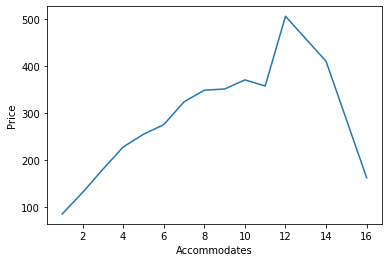

In [57]:
accomodates = pd.DataFrame(df_listings.groupby("accommodates")['price'].mean(), columns=['price'])

plt.ylabel("Price")
plt.xlabel("Accommodates")
plt.plot(accomodates);


Sice the graph for the data price and the number of accommodates in a room is linear till a certain point which is 10 person. Which implies that there mus be outlier in the data set. So in order to get the ideal analysis we need to remove those outliers. 

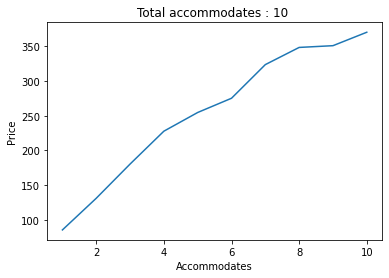

In [58]:
# Accommodates till 10
plt.title('Total accommodates : 10 ')
plt.ylabel("Price")
plt.xlabel("Accommodates")
plt.plot(accomodates[:10]);

In [59]:
# restricting acommodates till 10 person
df_listings = df_listings[df_listings['accommodates']<= 10]

In [60]:
# check shape
df_listings.shape

(3571, 99)

Now the total rows are 3571 and 99 columns

In [61]:
# Check for null values.
check_null(df_listings)

id                                                 0           :  0.00 %
host_id                                            0           :  0.00 %
host_since                                         0           :  0.00 %
host_response_time                                 0           :  0.00 %
host_response_rate                                 471         :  13.19 %
host_acceptance_rate                               471         :  13.19 %
host_listings_count                                0           :  0.00 %
host_has_profile_pic                               0           :  0.00 %
host_identity_verified                             0           :  0.00 %
neighbourhood_cleansed                             0           :  0.00 %
property_type                                      0           :  0.00 %
room_type                                          0           :  0.00 %
accommodates                                       0           :  0.00 %
bathrooms                                        

* So there are still null values in the data set, either we'll have to remove or fill in the blank spaces. 
* `host_response_rate` column has 471 data missing, 13.14%.
* `host_acceptance_rate` column has 471 data missing, 13.14%.
* `security_deposit` column has 2243 data missing, 62.57%.
* `cleaning_fee` column has 1107 data missing, 30.88%.
* `review_scores_rating` column has 813 data missing, 22.68%.
* `review_scores_accuracy` column has 823 data missing, 22.96%.
* `review_scores_cleanliness` column has 818 data missing, 22.82%.
* `review_scores_checkin` column has 820 data missing, 22.87%.
* `review_scores_communication` column has 818 data missing, 22.82%.
* `review_scores_location` column has 822 data missing, 22.93%.
* `review_scores_value` column has 821 data missing, 22.90%.
* `reviews_per_month` column has 756 data missing around 21.09%.

##### To fill in the null values for the quantitative columns, I'll use mean function and different approach for the whole column to fill it.

In [62]:
# Fill the null values by mean as the missing values do not exceed than 15% so its safe to apply the mean to 
# fill in the values.

for i in ['host_response_rate','host_acceptance_rate']:
    df_listings[i] = round(df_listings[i].fillna(df_listings[i].mean()))

In [63]:
# Fill the null values by 0 as the missing values exceeds more than 30%.
# fill in the values.

for i in ['security_deposit','cleaning_fee']:
    df_listings[i].fillna(0,inplace = True)

In [64]:
# fill null values with 0 for the column reviews per month as they might not have reviews therefor the values are null.
for i in ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']:
    df_listings[i].fillna(0,inplace=True)

In [65]:
df_listings[['security_deposit','cleaning_fee']].describe()

,security_deposit,cleaning_fee
count,3571.000000,3571.000000
mean,120.833100,46.956315
std,255.230138,52.858437
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,30.000000
75%,150.000000,80.000000
max,4500.000000,300.000000


##### Addition of extra column

* From the column host_since, i'll create a new column `host_since_days`. The value would be calculated as 
  last data fetched date substracted by the host_since value. 

In [66]:
# create new column host_since_days

day_scrap = ['2020-03-16'] * len(df_listings)
day_scrap = pd.to_datetime(day_scrap)
df_listings['host_since_days'] = (day_scrap - df_listings['host_since']).dt.days

In [67]:
# Now we can drop the column host_since as it serves no more purpose.
df_listings.drop(['host_since'], axis = 1 , inplace = True)

In [68]:
df_listings.shape

(3571, 99)

* Now the total number of rows are 3571 and 99 columns/variables.

## `reviews.csv`

In [69]:
# explore data set and decide which columns to keep.
df_reviews.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


* This data set consists of reviews of AirBnB from customer. 
* So its important to keep `comments` column and `listing_id` column to join this data set with the `listings` data set.
* Rest of the columns are not necessary, so i'll drop them.

In [70]:
# drop columns 
df_reviews.drop(['reviewer_id','reviewer_name'], axis = 1, inplace = True)

##### Check for null values

In [71]:
check_null(df_reviews)

listing_id                                         0           :  0.00 %
id                                                 0           :  0.00 %
date                                               0           :  0.00 %
comments                                           53          :  0.08 %


* There is are 53 data missing in column `comments` which comprises of 0.08% of the total data.

##### Remove null values

In [72]:
# Since the null values totals to  data around 0.08%. So it would mean no harm to remove the null values
df_reviews = df_reviews.dropna(axis = 0)

In [73]:
#check for null
check_null(df_reviews)

listing_id                                         0           :  0.00 %
id                                                 0           :  0.00 %
date                                               0           :  0.00 %
comments                                           0           :  0.00 %


In [74]:
df_reviews.shape

(68222, 4)

* Now the total number of rows are 68222 and 4 columns respectively.

In [75]:
# change data type for date column to datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

##### Check data type for columns

In [76]:
check_dtype(df_reviews)

0       listing_id                                        int64
1       id                                                int64
2       date                                              datetime64[ns]
3       comments                                          object


## `calendar.csv`

In [77]:
# explore data set and decide which columns to keep.
df_calendar.head(20)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


In [78]:
check_dtype(df_calendar)

0       listing_id                                        int64
1       date                                              object
2       available                                         object
3       price                                             object


In [79]:
check_null(df_calendar)

listing_id                                         0           :  0.00 %
date                                               0           :  0.00 %
available                                          0           :  0.00 %
price                                              665853      :  50.87 %


* This data set consists of reviews of AirBnB from customer. 
* So its important to keep `comments` column and `listing_id` column to join this data set with the `listings` data set.
* Rest of the columns are not necessary, so i'll drop them.

In [80]:
# remove $ from price column
df_calendar['price'] = df_calendar['price'].str.replace("$",'').str.replace(",",'')

In [81]:
# change t/f to 1/0 in column `available`
df_calendar['available'] = df_calendar['available'].str.replace('t','1').str.replace('f','0')

In [82]:
# change data type for columns `date`, `available` and `price`.
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_calendar['available'] = df_calendar['available'].astype(np.int64)
df_calendar['price'] = pd.to_numeric(df_calendar['price'])

##### Check data type for columns

In [83]:
check_dtype(df_calendar)

0       listing_id                                        int64
1       date                                              datetime64[ns]
2       available                                         int64
3       price                                             float64


##### Check for null values

In [84]:
check_null(df_calendar)

listing_id                                         0           :  0.00 %
date                                               0           :  0.00 %
available                                          0           :  0.00 %
price                                              665853      :  50.87 %


* There is are 665853 data missing in column `price` which comprises of 50.87% of the total data.

In [85]:
df_calendar.shape

(1308890, 4)

* There are 1308890 rows and 4 columns in the data set.

##### Remove null values

In [86]:
# Since the null values totals to  data around 0.08%. So it would mean no harm to remove the null values
df_calendar = df_calendar.dropna(axis = 0)

In [87]:
#check for null
check_null(df_calendar)

listing_id                                         0           :  0.00 %
date                                               0           :  0.00 %
available                                          0           :  0.00 %
price                                              0           :  0.00 %


In [88]:
df_calendar.shape

(643037, 4)

* Now total number of rows are 643037 and 4 columns.

In [89]:
# sort date by descending order
df_calendar = df_calendar.sort_values('listing_id', ascending=True)

In [90]:
# mean of the monthly price of listing id.
average_price = pd.DataFrame()
average_price = round(df_calendar.groupby(['listing_id'])[['price']].mean(), 2).sort_values(by='listing_id',ascending=True)

In [91]:
# reset index for multiindex
average_price.columns = ['avg_price']
average_price = average_price.reset_index()

In [92]:
# add to final data frame with id match
average_price

,listing_id,avg_price
0,3353,35.20
1,5506,147.27
2,6695,197.41
3,6976,65.00
4,8792,154.00
...,...,...
2901,14924831,169.52
2902,14928000,55.00
2903,14928333,105.38
2904,14933380,49.00


In [93]:
# count of the price of listing id, i.e., the total times the property has been booked totally in the given period of time.
booking_count = pd.DataFrame()
booking_count = df_calendar.groupby(['listing_id'])[['price']].count().sort_values(by='listing_id',ascending=True) 

In [94]:
# reset index for multiindex
booking_count.columns = ['booking_count']
booking_count = booking_count.reset_index()

In [95]:
booking_count

,listing_id,booking_count
0,3353,249
1,5506,344
2,6695,324
3,6976,319
4,8792,248
...,...,...
2901,14924831,66
2902,14928000,365
2903,14928333,339
2904,14933380,81


In [96]:
# add two data frames
df_listings_count_price = pd.merge(booking_count,average_price,how = 'outer', left_on=['listing_id'], right_on = ['listing_id'])

In [97]:
df_listings_count_price

,listing_id,booking_count,avg_price
0,3353,249,35.20
1,5506,344,147.27
2,6695,324,197.41
3,6976,319,65.00
4,8792,248,154.00
...,...,...,...
2901,14924831,66,169.52
2902,14928000,365,55.00
2903,14928333,339,105.38
2904,14933380,81,49.00


## 4. Modeling

##### Check review sentiment scores

In [98]:
# The material on sentiment analysis has been pulled out from medium, where a model has been created to provide the 
# scores based on a sentiment of a sentence. This will be helpful while analyzing the comment and append scores to it.
# Thanks to author for providing the material.
# https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

* The `compound` score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). The higher the compound value the higher is the positive score for the given sentence. There are four parameters provided during output, 1. neg - stands for negative score, 2. neu - stands for neutral score, 3. pos - stands for positive score and 4. compond which aggregates all the scores and provides a unified score.

In [99]:
df_reviews['comments'] = df_reviews['comments'].astype(str)

In [100]:
df_reviews

,listing_id,id,date,comments
0,1178162,4724140,2013-05-21,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...
68270,7462268,80537457,2016-06-18,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,Staying in Lower Allston at Joe and Nancy's pl...


In [101]:
# create a dictionary to store sentiments values
datax = {'neg':[],'neu':[],'pos':[],'compound':[]}

In [102]:
# store sentiment values to datax
comm = df_reviews['comments'].astype(str)

for text in comm:
    lol = sentiment_analyzer_scores(text)
    for a in [lol]:
        datax['neg'].append(lol['neg'])
        datax['neu'].append(lol['neu'])
        datax['pos'].append(lol['pos'])
        datax['compound'].append(lol['compound'])

In [103]:
# converting datax data type to pandas dataframe.
data_x = pd.DataFrame(datax)

In [104]:
# check shape for the data
data_x.shape

(68222, 4)

In [105]:
# addings the columns 'neg','neu','pos','compound' to df_reviews dataframe
df_reviews = pd.concat([df_reviews,data_x], axis = 1)

In [106]:
df_reviews

,listing_id,id,date,comments,neg,neu,pos,compound
0,1178162.0,4724140.0,2013-05-21,My stay at islam's place was really cool! Good...,0.0,0.653,0.347,0.9626
1,1178162.0,4869189.0,2013-05-29,Great location for both airport and city - gre...,0.0,0.650,0.350,0.9061
2,1178162.0,5003196.0,2013-06-06,We really enjoyed our stay at Islams house. Fr...,0.0,0.776,0.224,0.9662
3,1178162.0,5150351.0,2013-06-15,The room was nice and clean and so were the co...,0.0,0.685,0.315,0.9229
4,1178162.0,5171140.0,2013-06-16,Great location. Just 5 mins walk from the Airp...,0.0,0.662,0.338,0.8658
...,...,...,...,...,...,...,...,...
68270,7462268.0,80537457.0,2016-06-18,Joe y su mujer son encantadores. La habitación...,NaN,NaN,NaN,NaN
68271,7462268.0,83640094.0,2016-07-03,Joe was on his way to Jamaica to be married! o...,NaN,NaN,NaN,NaN
68272,7462268.0,85797088.0,2016-07-13,The room was very clean as were the bathrooms ...,NaN,NaN,NaN,NaN
68273,7462268.0,97264637.0,2016-08-26,Staying in Lower Allston at Joe and Nancy's pl...,NaN,NaN,NaN,NaN


In [107]:
# remove rows with nan values
df_reviews = df_reviews.dropna()

In [108]:
# check shape
df_reviews.shape

(68169, 8)

In [109]:
df_reviews.describe()

,listing_id,id,neg,neu,pos,compound
count,6.816900e+04,6.816900e+04,68169.000000,68169.000000,68169.000000,68169.000000
mean,4.755399e+06,5.242806e+07,0.013474,0.712344,0.274166,0.809249
std,3.786946e+06,2.790001e+07,0.031241,0.142680,0.148740,0.328912
min,3.353000e+03,1.021000e+03,0.000000,0.000000,0.000000,-0.997500
25%,1.454258e+06,3.007770e+07,0.000000,0.639000,0.183000,0.835300
50%,4.075898e+06,5.219018e+07,0.000000,0.724000,0.264000,0.935900
75%,7.368611e+06,7.660259e+07,0.016000,0.798000,0.353000,0.970900
max,1.484378e+07,9.999045e+07,0.688000,1.000000,1.000000,0.999400


* Since the reviews are multiple for listings_id, therefor i'll be aggregating the values with mean() function by performing groupby `listing_id`


In [110]:
# perform mean on 'neg','neu','pos','compound' by grouping by listing_id and store in new dataframe
df_rev = df_reviews.groupby('listing_id').agg({'neg': ['mean'],'neu': ['mean'],'pos': ['mean'],'compound': ['mean']})

In [111]:
# check data
df_rev

,neg,neu,pos,compound
,mean,mean,mean,mean
listing_id,,,,
3353.0,0.024029,0.758324,0.217676,0.700406
5506.0,0.006583,0.731889,0.261528,0.892311
6695.0,0.016021,0.731936,0.252064,0.841979
6976.0,0.006390,0.711098,0.282537,0.933349
8792.0,0.012333,0.747556,0.239944,0.788922
...,...,...,...,...
14813006.0,0.000000,0.684000,0.316000,0.571900
14823724.0,0.051000,0.886000,0.063000,0.128000


* Applying multiple aggregation functions to columns will result in a multiindex, therefor we must handle it.
 

In [112]:
# Rename columns in the dataframe
df_rev.columns = ['neg_mean', 'neu_mean', 'pos_mean', 'compound_mean']

In [113]:
# Reset index to make everything right.
df_rev = df_rev.reset_index()

In [114]:
df_rev

,listing_id,neg_mean,neu_mean,pos_mean,compound_mean
0,3353.0,0.024029,0.758324,0.217676,0.700406
1,5506.0,0.006583,0.731889,0.261528,0.892311
2,6695.0,0.016021,0.731936,0.252064,0.841979
3,6976.0,0.006390,0.711098,0.282537,0.933349
4,8792.0,0.012333,0.747556,0.239944,0.788922
...,...,...,...,...,...
2821,14813006.0,0.000000,0.684000,0.316000,0.571900
2822,14823724.0,0.051000,0.886000,0.063000,0.128000
2823,14842237.0,0.000000,0.544000,0.456000,0.968200
2824,14843050.0,0.000000,0.639000,0.361000,0.921950


### Merging two dataframes `df_listings` and `df_rev` (cleaned `df_reviews`)

In [115]:
# joining two data frames with the unique id 
df_final = pd.merge(df_listings,df_rev,how = 'inner', left_on=['id'], right_on = ['listing_id'])

In [116]:
# check shape for new dataframe
df_final.shape

(2813, 104)

In [117]:
# check for null values
check_null(df_final)

id                                                 0           :  0.00 %
host_id                                            0           :  0.00 %
host_response_time                                 0           :  0.00 %
host_response_rate                                 0           :  0.00 %
host_acceptance_rate                               0           :  0.00 %
host_listings_count                                0           :  0.00 %
host_has_profile_pic                               0           :  0.00 %
host_identity_verified                             0           :  0.00 %
neighbourhood_cleansed                             0           :  0.00 %
property_type                                      0           :  0.00 %
room_type                                          0           :  0.00 %
accommodates                                       0           :  0.00 %
bathrooms                                          0           :  0.00 %
bedrooms                                           

* As the dataframe took its final shape it's time to remove the columns which are not necessary any further. The columns are `id` , `host_id` and `listing_id`.

### Merging two dataframes `df_listings` and `df_listings_count_price` (modified `df_calendar`)

In [118]:
# joining two data frames with the unique id 
df_final = pd.merge(df_final,df_listings_count_price,how = 'inner', left_on=['id'], right_on = ['listing_id'])

In [119]:
df_final.shape

(2374, 107)

In [120]:
# drop columns
df_final.drop(['id','host_id','listing_id_x','listing_id_y'], axis = 1, inplace = True)

In [121]:
df_final

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,room_type_entire_home_apt,room_type_private_room,room_type_shared_room,bed_type_real_bed,bed_type_futon,bed_type_airbed,bed_type_pullout_sofa,bed_type_couch,property_type_apartment,property_type_house,property_type_condominium,property_type_townhouse,property_type_bed_breakfast,property_type_loft,property_type_other,property_type_boat,property_type_villa,property_type_entire_floor,property_type_dorm,property_type_camper_rv,property_type_guesthouse,cancellation_policy_strict,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_super_strict_30,amenities_ac,amenities_internet,amenities_parking,amenities_tv,amenities_breakfast,house_rules_no_smoking,host_response_time_within_an_hour,host_response_time_within_a_few_hours,host_response_time_within_a_day,host_response_time_a_few_days_or_more,neighbourhood_cleansed_jamaica_plain,neighbourhood_cleansed_south_end,neighbourhood_cleansed_back_bay,neighbourhood_cleansed_fenway,neighbourhood_cleansed_dorchester,neighbourhood_cleansed_allston,neighbourhood_cleansed_beacon_hill,neighbourhood_cleansed_brighton,neighbourhood_cleansed_south_boston,neighbourhood_cleansed_downtown,neighbourhood_cleansed_east_boston,neighbourhood_cleansed_roxbury,neighbourhood_cleansed_north_end,neighbourhood_cleansed_mission_hill,neighbourhood_cleansed_charlestown,neighbourhood_cleansed_south_boston_waterfront,neighbourhood_cleansed_chinatown,neighbourhood_cleansed_roslindale,neighbourhood_cleansed_west_end,neighbourhood_cleansed_west_roxbury,neighbourhood_cleansed_hyde_park,neighbourhood_cleansed_mattapan,neighbourhood_cleansed_bay_village,neighbourhood_cleansed_longwood_medical_area,neighbourhood_cleansed_leather_district,host_since_days,neg_mean,neu_mean,pos_mean,compound_mean,booking_count,avg_price
0,within an hour,100.0,100.0,1,1,1,Roslindale,Apartment,Private room,2,1,1,1,Real Bed,65.0,95.0,10.0,0,0.0,2,15,26,54,84,359,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,moderate,1.30,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2839,0.011806,0.705361,0.282833,0.922339,359,67.81
1,within a few hours,100.0,88.0,1,1,1,Roslindale,Apartment,Private room,2,1,1,1,Real Bed,65.0,0.0,0.0,1,20.0,3,45,19,46,61,319,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0,moderate,0.47,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3962,0.006390,0.711098,0.282537,0.933349,319,65.00
2,within a few hours,100.0,50.0,1,1,0,Roslindale,House,Private room,4,1,1,2,Real Bed,75.0,100.0,50.0,2,25.0,1,1125,6,16,26,98,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,1.00,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2521,0.154000,0.846000,0.000000,-0.968600,98,75.00
3,within an hour,100.0,100.0,1,1,1,Roslindale,House,Private room,2,1,1,2,Real Bed,79.0,0.0,15.0,1,0.0,2,31,13,34,59,334,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,0,flexible,2.25,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2136,0.007931,0.749000,0.243069,0.784662,334,79.00
4,within a few hours,100.0,95.0,2,1,1,Roslindale,Condominium,Private room,2,1,1,1,Real Bed,75.0,0.0,30.0,1,0.0,2,1125,5,28,58,58,8,100.0,10.0,10.0,10.0,10.0,9.0,10.0,0,flexible,1.70,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [122]:
# check data types
check_dtype(df_final)

0       host_response_time                                object
1       host_response_rate                                float64
2       host_acceptance_rate                              float64
3       host_listings_count                               int64
4       host_has_profile_pic                              int64
5       host_identity_verified                            int64
6       neighbourhood_cleansed                            object
7       property_type                                     object
8       room_type                                         object
9       accommodates                                      int64
10      bathrooms                                         int64
11      bedrooms                                          int64
12      beds                                              int64
13      bed_type                                          object
14      price                                             float64
15      security_deposit     

In [123]:
# drop columns with only one unique data
remove_unique(df_final)

['property_type_camper_rv']


### Visualizing the data

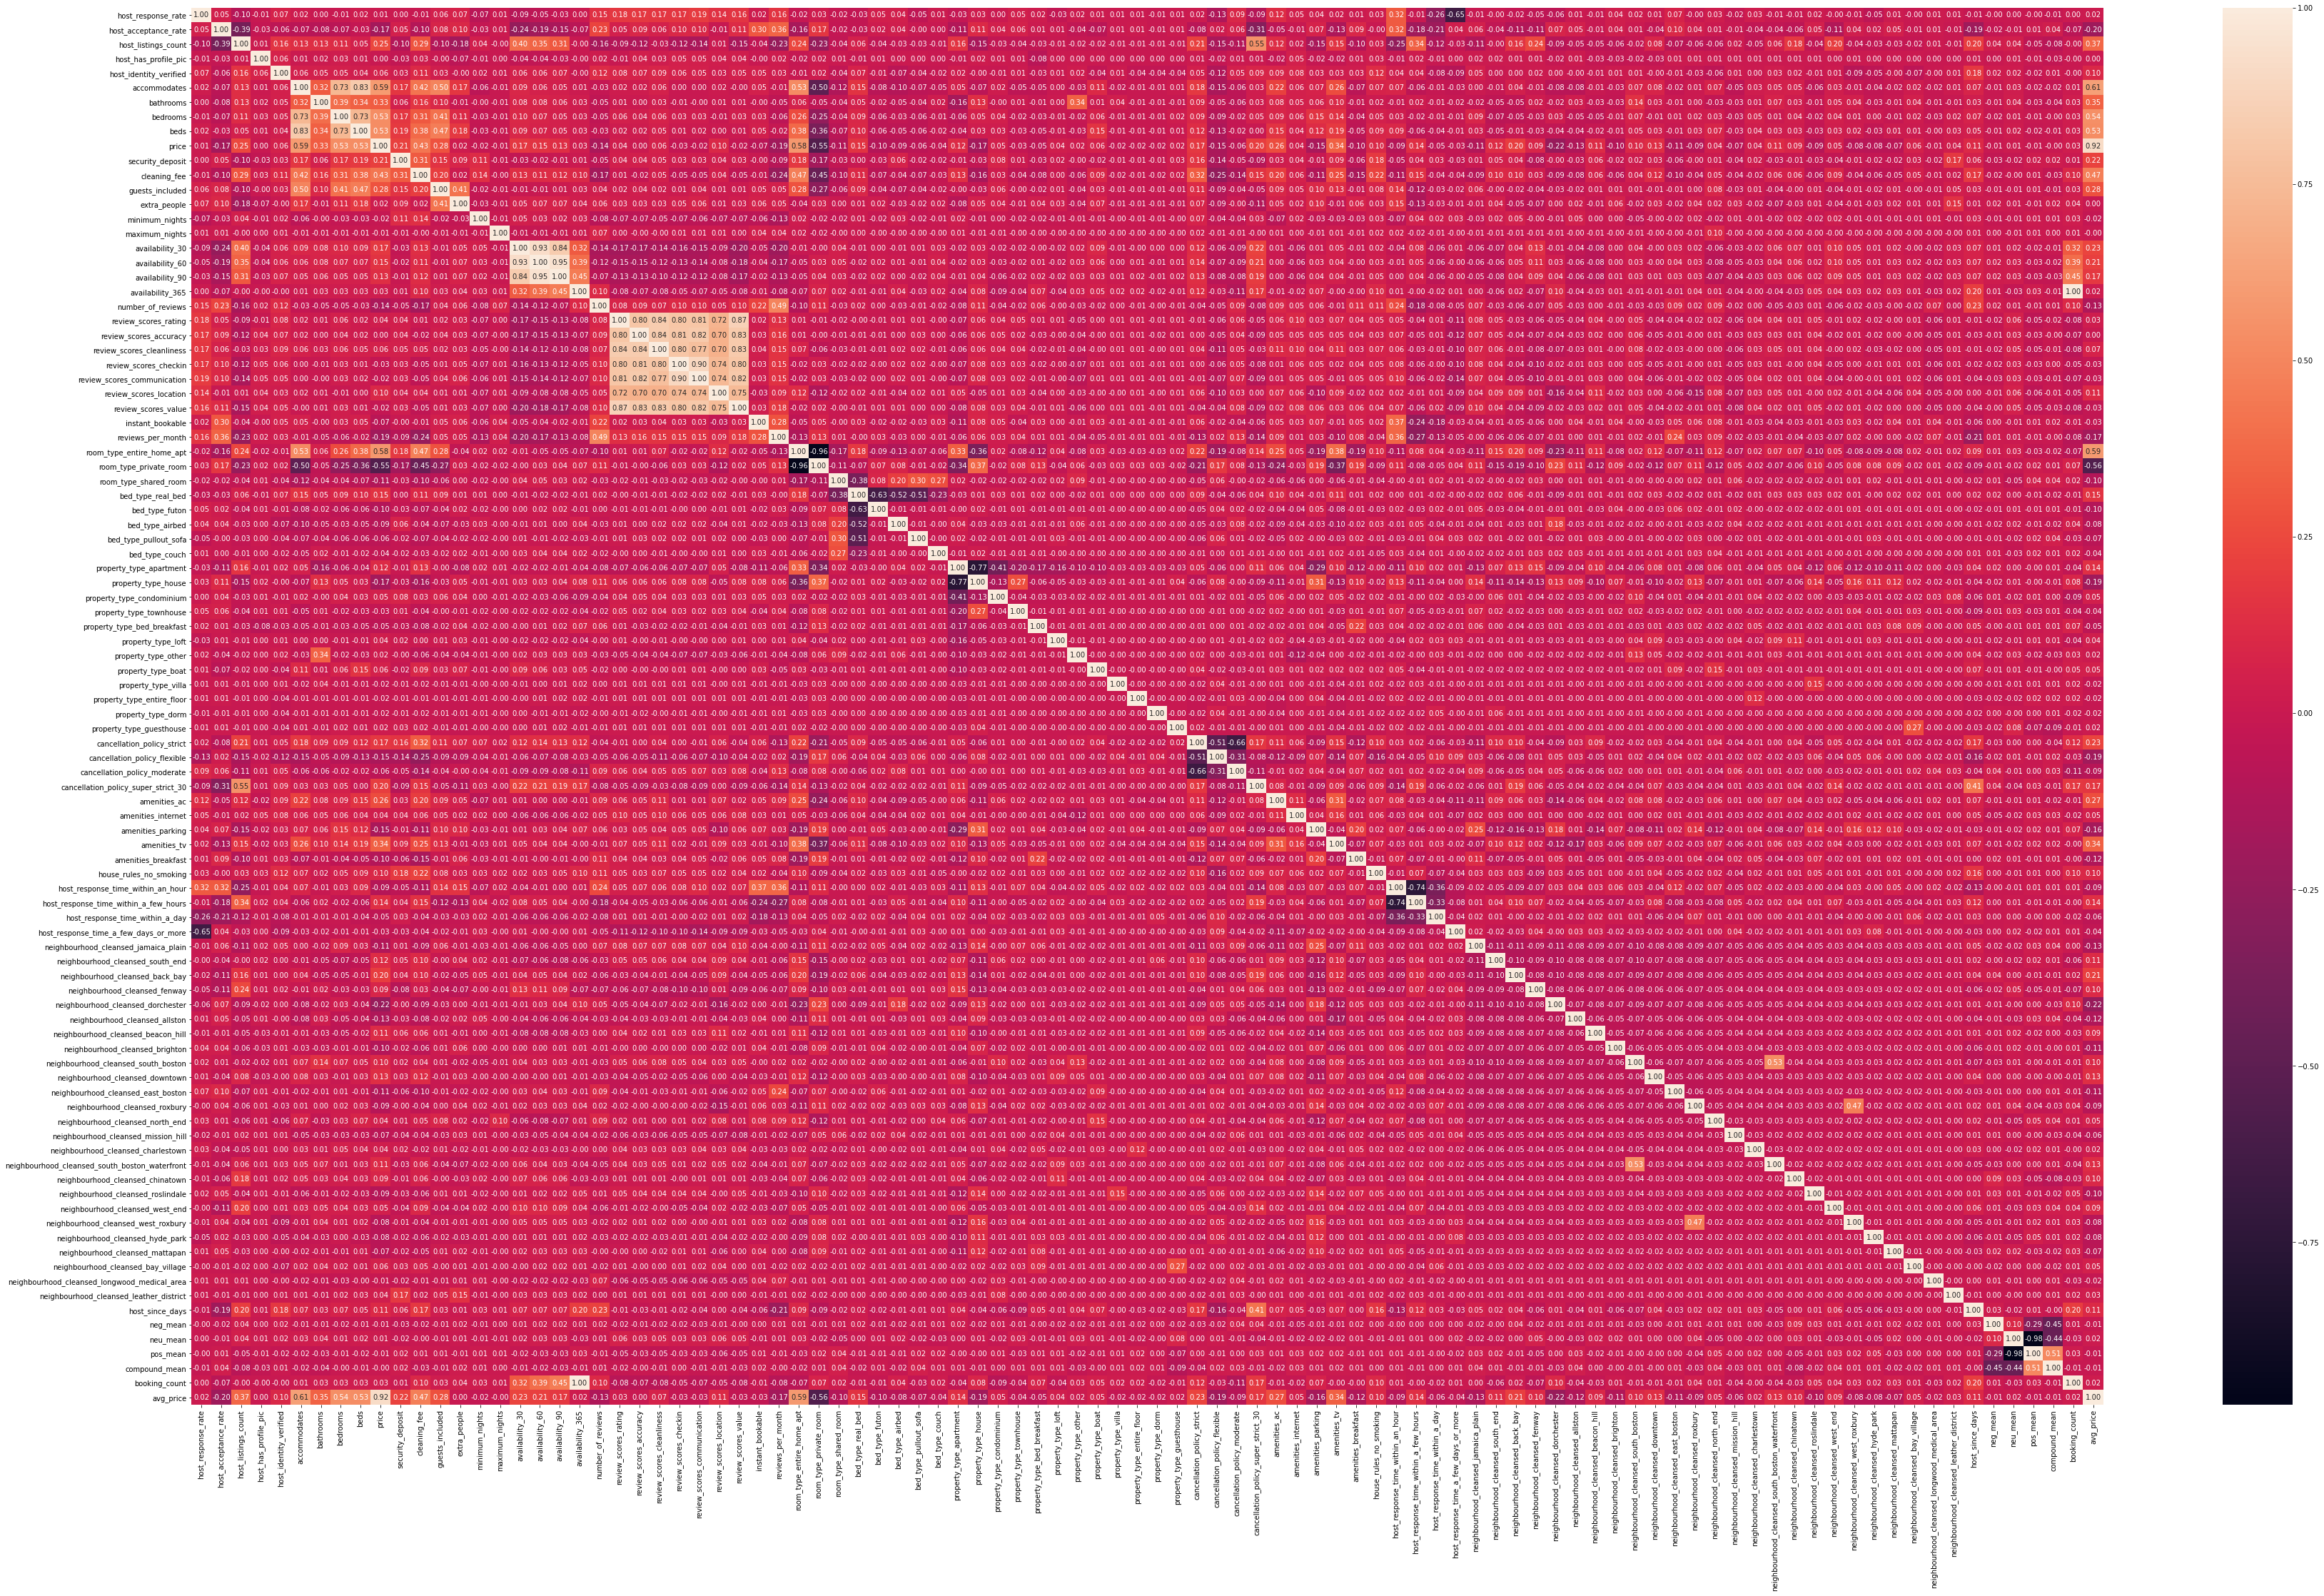

In [124]:
# visualizing the dataframe with heat map and check for the correlation between different varibales.
fig, ax = plt.subplots(figsize=(60,36))
sns.heatmap(df_final.corr(), annot = True,  fmt='.2f');

* We can clearly observe that there are many variables which highly correlate with each others. So the variable which correlate with each other with more than 65%, i'll be removing those columns to make the data set free of any interdependancy.
* Columns `bedrooms` and `beds` have huge correlation with bathrooms, drop these.
* Columns `availability_30`, `availability_60` and `availability_90` also have huge correlation with availablity_365, drop these.
* Column `review_scores_accuracy`,`review_scores_cleanliness`,`review_scores_checkin`,`review_scores_communication`, `review_scores_location` and `review_scores_value` has high correlation with review_scores_rating, drop it.
* Columns `neg_mean`, `neu_mean` and `pos_mean` also have huge correlation with compound_mean, drop these.

In [125]:
# drop columns
high_corr = ['bedrooms','beds','availability_60','availability_90','availability_365','review_scores_accuracy', 
             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
             'review_scores_location', 'review_scores_value','neg_mean','neu_mean','pos_mean','price']
df_final.drop(high_corr, axis = 1, inplace = True)

## 5. Evaluation

In this step I will answer all the questions which have been raised before for the profitable business solutions.

### 5.1 Which neighbourhoods in Boston are the most costliest and cheapest ?


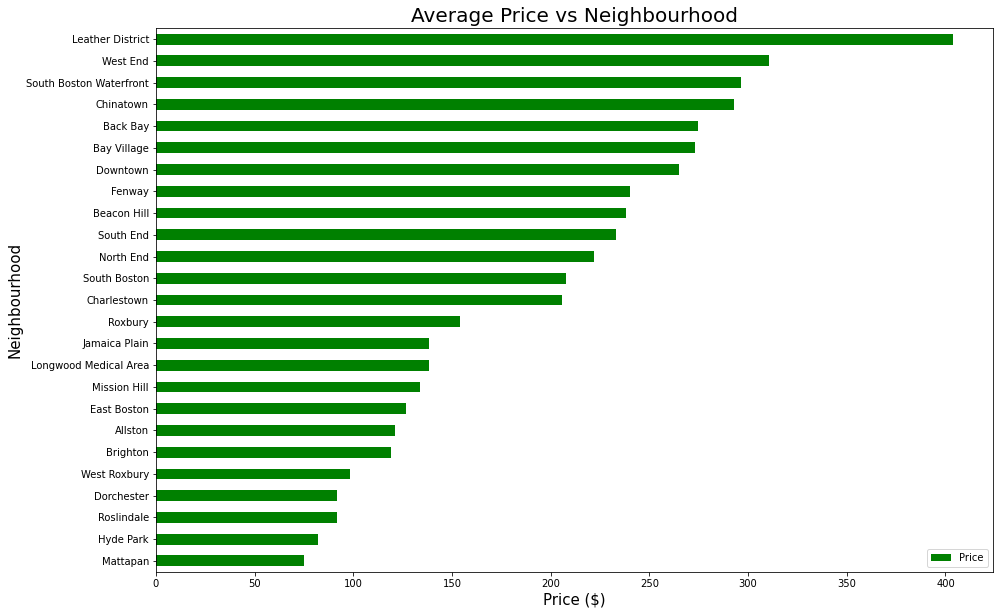

In [126]:
# plot bar plot - for average price in different locations 
price_boston = df_final.groupby(['neighbourhood_cleansed'])[['avg_price']].mean().sort_values(by='avg_price',ascending=True)
price_boston.plot(kind='barh', figsize = (15,10), color ='green')
plt.title('Average Price vs Neighbourhood', fontsize = 20)
plt.ylabel('Neighbourhood', fontsize = 15)
plt.xlabel('Price ($)', fontsize = 15)
plt.legend(['Price'])
plt.savefig('price_neighbourhood.png')

### Findings

* From the bar plot we can observe that Leather District is clearly the most expensive location around Boston with average price of more than 4000 dollars. Next comes West End and South Boston Waterfront with average pricing of 300 - 330 dollars which clearly distinguishable from Leather District as the difference is around 100 dollars.
* And as goes for the cheapest locations, Mattapan is the cheapest one with average price of 75 dollars. Next comes Hyde Park with around 80 dollars and Dorchester, Rosindale with around 90 dollars average.

### 5.2 Does the total number of bookings depends on the price of the properties in the neighborhood ?


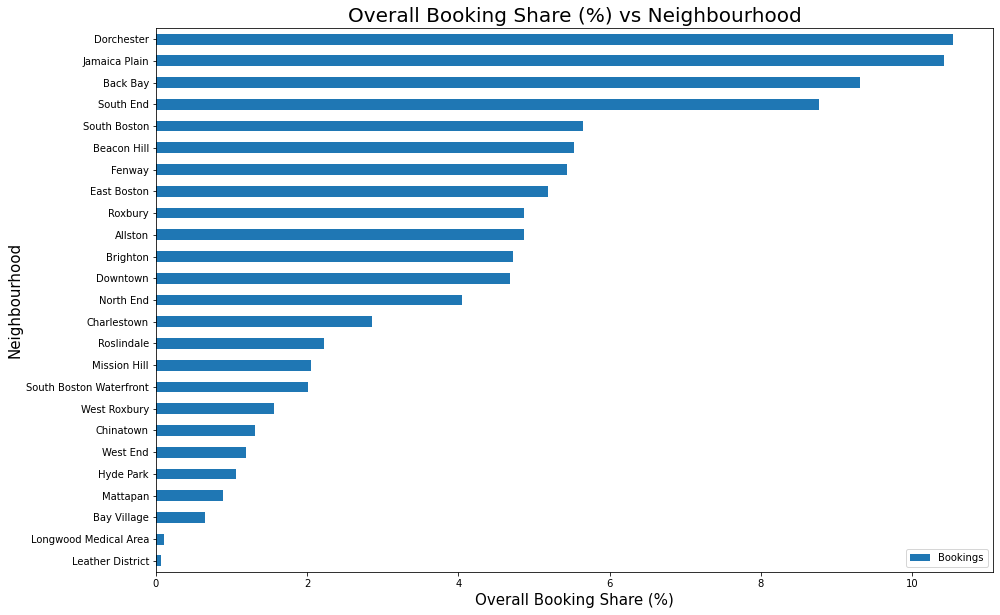

In [127]:
# plot bar plot - for count of listings in different locations in descending order.
count_boston = (((df_final.groupby(['neighbourhood_cleansed'])[['booking_count']].sum())/df_final['booking_count'].sum())*100).sort_values(by='booking_count',ascending=True)
count_boston.sort_values(by = 'booking_count').plot(kind='barh' ,figsize = (15,10))
plt.title('Overall Booking Share (%) vs Neighbourhood', fontsize = 20)
plt.ylabel('Neighbourhood', fontsize = 15)
plt.xlabel('Overall Booking Share (%)', fontsize = 15)
plt.legend(['Bookings'])
plt.savefig('booking_neighbourhood.png')

### Findings

* The highest booked neighbourhood are Dorchester and Jamaica Plain with more than 10% share, then comes Black Bay and South End with slightly more than 9%  and the least booked regions are Leather District, Longwood Medical Area, Bay Village and Mattapan with less than 1% booking overall. 
* No wonder we see total bookings for Leather District and Longwood Medical Area is far less than 1%, because of the high average price of Leather District which is more than '400' dollars and for Longwood Medical Area is slightly less than '150' dollar it might be due to georaphical reason for less bookings and less average price for the region.
* The average price of Dorchester region is around '90' dollar and Jamaica Plain average priceis around '140' dollar, so we can clearly see a pattern in the number of bookings increase as the price of the property is low, in this case which is less than 150 dollars.


### 5.3 What are the different property types and room types which people prefer to book ?

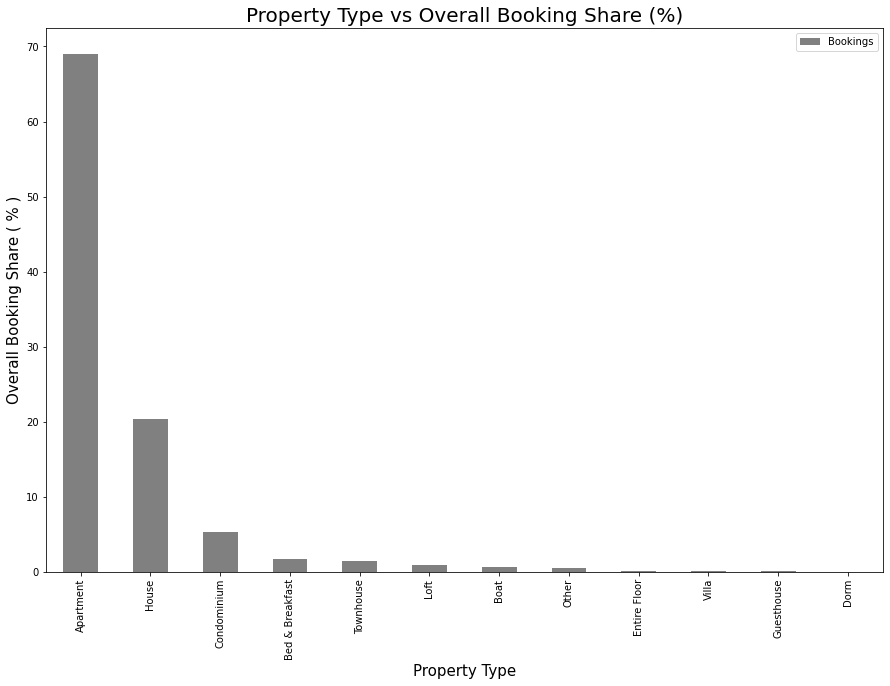

In [128]:
# plot bar plot - for percentage of bookings in different property types.
property_type_boston = (((df_final.groupby(['property_type'])[['booking_count']].sum())/df_final['booking_count'].sum())*100).sort_values(by='booking_count',ascending=False)
property_type_boston.plot(kind='bar' ,figsize = (15,10),color = 'grey')
plt.title('Property Type vs Overall Booking Share (%)', fontsize = 20)
plt.xlabel('Property Type', fontsize = 15)
plt.ylabel('Overall Booking Share ( % )', fontsize = 15)
plt.legend(['Bookings'])
plt.savefig('booking_property_type.png')

### Findings

* Most booked property type is Apartment with around 70% share next comes House with ~20% share and Condominium with ~5% share.
* The least booked property type is Villa, Guesthouse and Dorn with share less than 1%.

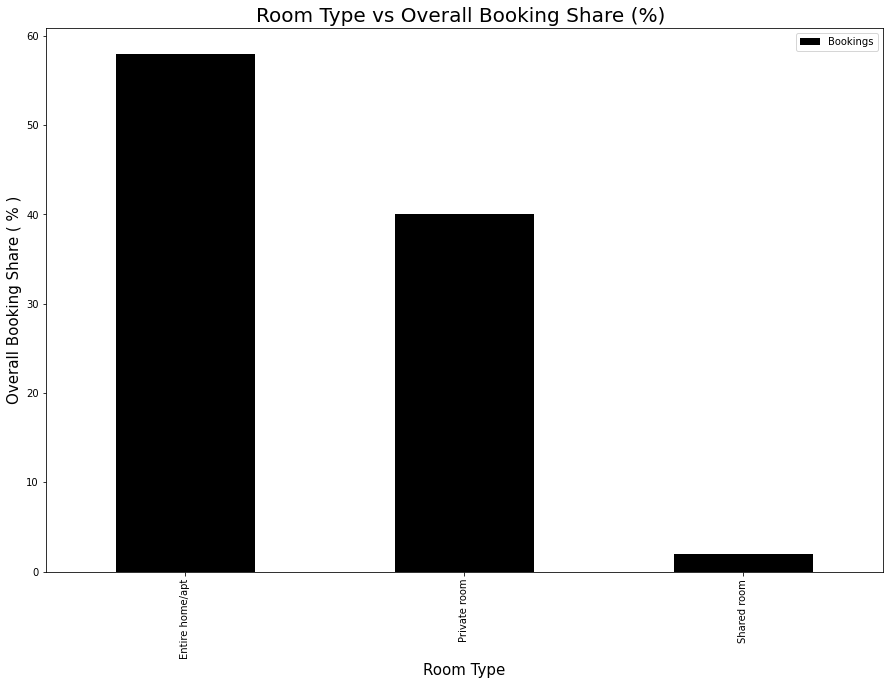

In [129]:
# plot bar plot - for percentage bookings in different room types.
room_type_boston = (((df_final.groupby(['room_type'])[['booking_count']].sum())/df_final['booking_count'].sum())*100).sort_values(by='booking_count',ascending=False)
room_type_boston.plot(kind='bar' ,figsize = (15,10),color = 'black')
plt.title('Room Type vs Overall Booking Share (%) ', fontsize = 20)
plt.xlabel('Room Type', fontsize = 15)
plt.ylabel('Overall Booking Share ( % )', fontsize = 15)
plt.legend(['Bookings'])
plt.savefig('booking_room_type.png')

### Findings

* People book mostly Entire home/appartment and it has ~60% share overall, Private rooms with 40% share and the least booked room type is Shared room with less than 3%.

### 5.4 Which neighbouhoods in Boston are the highest and lowest rated by people along with average price and booking count ?

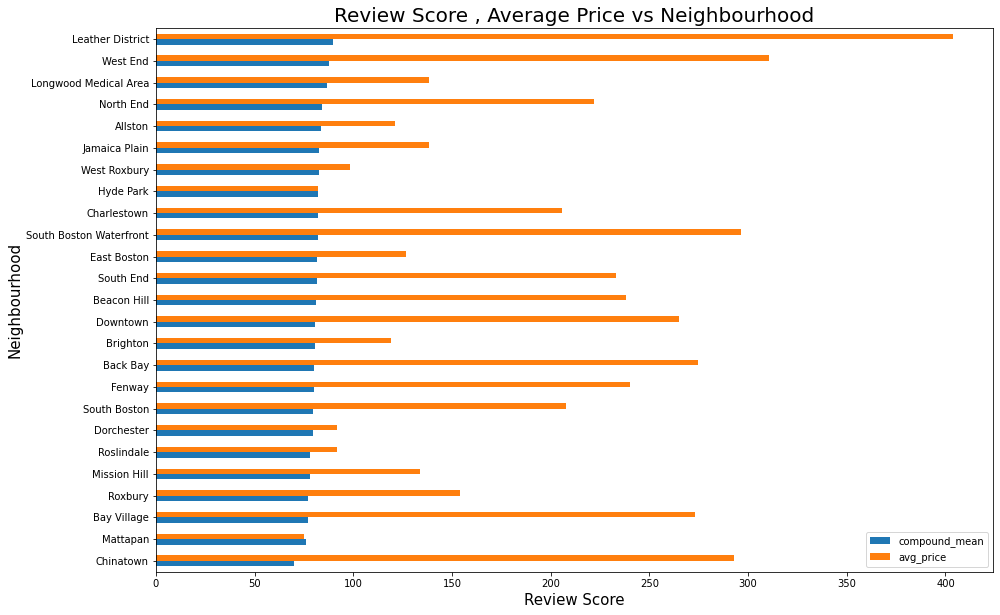

In [130]:
# plot bar plot - for average review and average price in different locations 
review_boston = (df_final.groupby(['neighbourhood_cleansed'])[['compound_mean']].mean()*100).sort_values(by='compound_mean',ascending=True)
price_boston = df_final.groupby(['neighbourhood_cleansed'])[['avg_price']].mean().sort_values(by='avg_price',ascending=True)
review_price = pd.merge(review_boston, price_boston, left_on = review_boston.index,right_on = price_boston.index)
review_price.index = review_price.key_0
review_price.sort_values(by = 'compound_mean').plot(kind='barh', figsize = (15,10))
plt.title('Review Score , Average Price vs Neighbourhood', fontsize = 20)
plt.ylabel('Neighbourhood',fontsize = 15)
plt.xlabel('Review Score', fontsize = 15)
plt.savefig('review_price.png')


### Findings

* The top reviewed neighbourhoods are Leather District, West End and Longwood Medical Area with greater than 90% positive scores.
* The lowest reviewed neighbourhoods are Chinatown, Bay Village and Mattapan with less than 78% positive scores.
* The reviews are good for the top two most pricey properties and rest of the reviews have no relation between average price of the neighborhood, it might be due to the geograhic location of the chaacteristics of the property itself.

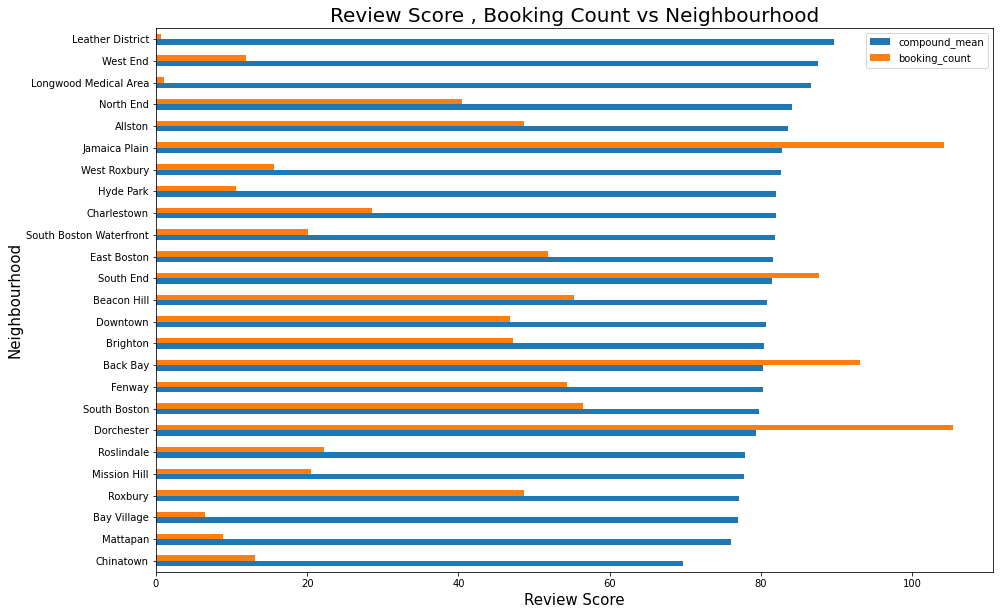

In [131]:
# plot bar plot - for average review and booking count in different locations 
review_boston = (df_final.groupby(['neighbourhood_cleansed'])[['compound_mean']].mean()*100).sort_values(by='compound_mean',ascending=True)
count_boston = (((df_final.groupby(['neighbourhood_cleansed'])[['booking_count']].sum())/df_final['booking_count'].sum())*1000).sort_values(by='booking_count',ascending=True)
review_count = pd.merge(review_boston, count_boston, left_on = review_boston.index,right_on = count_boston.index)
review_count.index = review_count.key_0
review_count.sort_values(by = 'compound_mean').plot(kind='barh', figsize = (15,10))
plt.title('Review Score , Booking Count vs Neighbourhood', fontsize = 20)
plt.ylabel('Neighbourhood',fontsize = 15)
plt.xlabel('Review Score', fontsize = 15)
plt.savefig('review_count.png')

### Findings

* The top reviewed neighbourhoods are Leather District, West End and Longwood Medical Area with greater than 90% positive scores.
* The lowest reviewed neighbourhoods are Chinatown, Bay Village and Mattapan with less than 78% positive scores.
* The reviews are good for the top two most pricey properties and rest of the reviews have no relation between average price of the neighborhood, it might be due to the geograhic location of the chaacteristics of the property itself.

### 5.5 What are the factors that relates to price of the property ?

This question can be sub divided into three sub categories - `amenities`,`ratings and reviews` and `property characteristics`.

#### 5.5.1 Does particular amenities provided to customers can obtain higher price ?

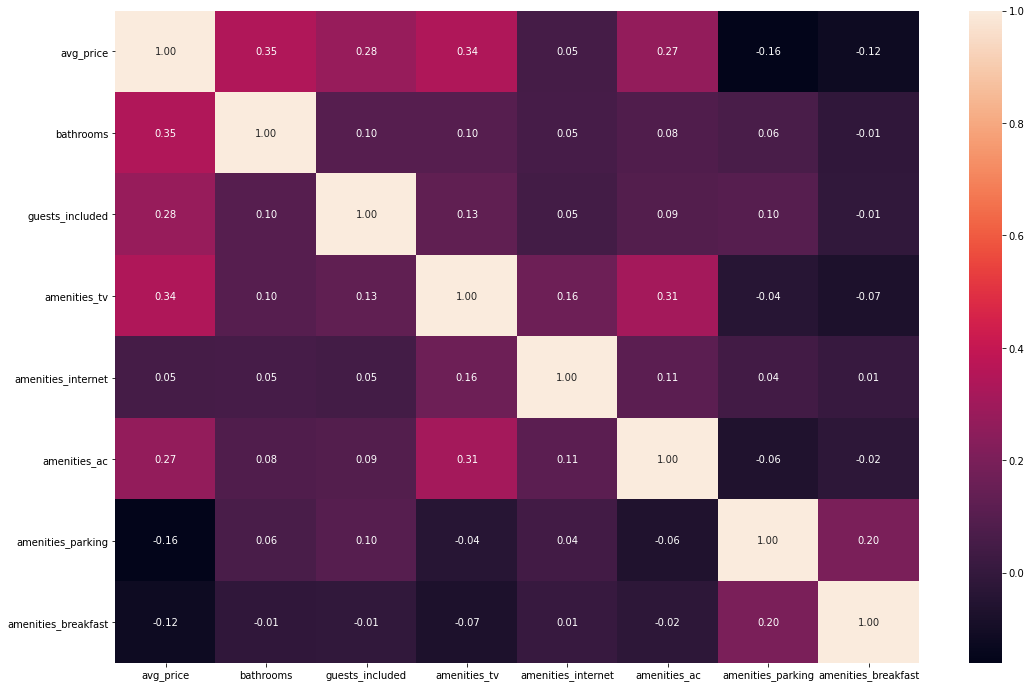

In [132]:
# analyze relation of price and amenities provided.
df_amenities = df_final[['avg_price','bathrooms','guests_included','amenities_tv','amenities_internet',
                         'amenities_ac','amenities_parking','amenities_breakfast']]
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df_amenities.corr(),annot=True,  fmt='.2f');
fig.savefig('amenities_heatmap.png')

### Findings

* From the above heat map we can clearly observe that the correlation of variable `price` with `bathrooms`,`guests_included`,`tv` and `ac` is high which means the increase in the value of these variables leads to the increase in the price of the property.
* As goes for `internet` the correlation is 0.05 which is rather low than the others which implies the price is not  impacted majorly with this service.
* The variables `parking` and `breakfast` have next to no impact on the price.

#### 5.5.2 Will the ratings and reviews play a crutial role when compared to price ?

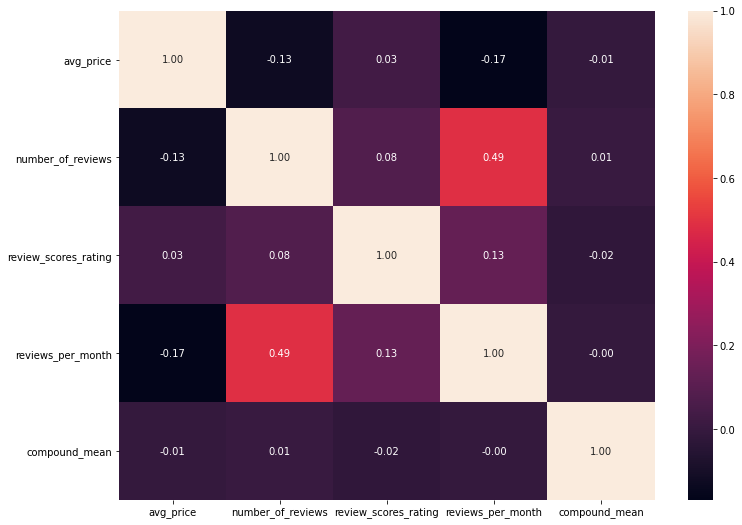

In [133]:
# analyze relation of price and reviws and ratings provided.
df_ratings = df_final[['avg_price','number_of_reviews','review_scores_rating','reviews_per_month','compound_mean']]
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df_ratings.corr(),annot=True,  fmt='.2f');
fig.savefig('ratings_heatmap.png')

### Findings

* From the above heat map we observe that the correlation of variable `price` with `review_scores_rating` which is the rating provided by the customer during stay and `compound_mean` which is the rating provided by the customer after service is less but observable which means the increase in the value of these variables leads to the increase in the price of the property but due to the low correlation it won't affect the price majorly.
* As goes for `number_of_reviews` which is the total number of reviews provided by customer to the property and `reviews_per_month` which is the average reviews per month is clearly low which implies the price is not impacted majorly with this service.

#### 5.5.3 Does property characteristics and services lead to obtain higher prices ?

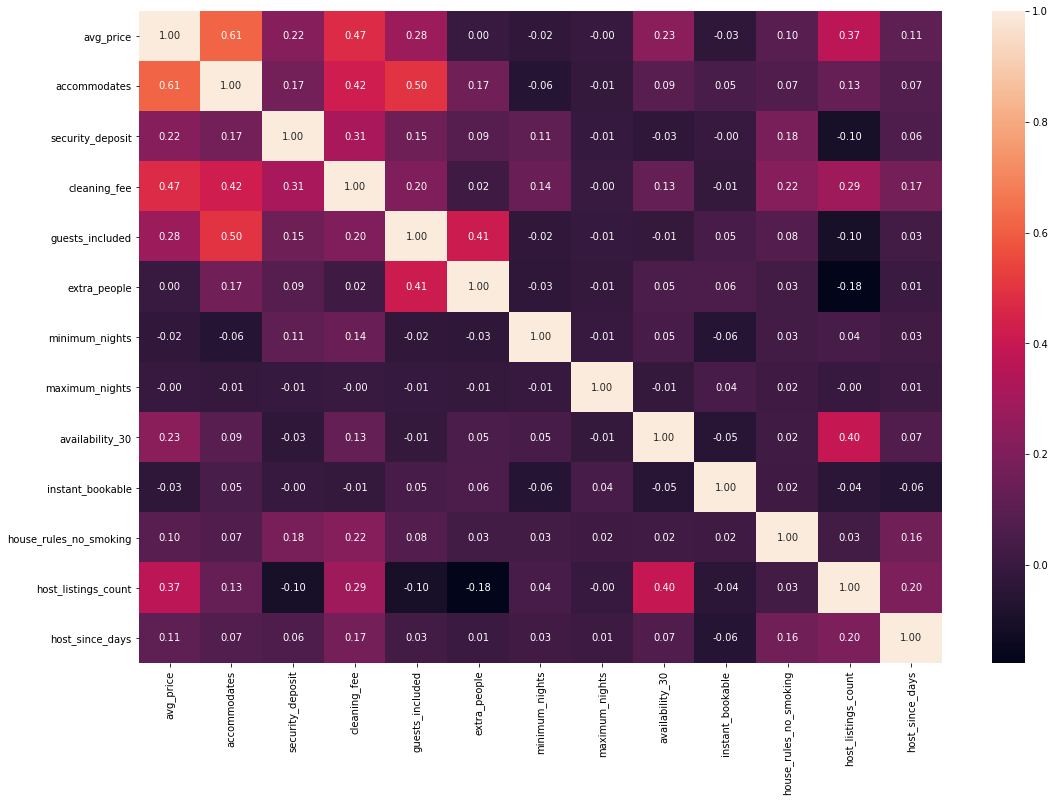

In [134]:
# analyze relation of price and amenities provided.
df_services = df_final[['avg_price','accommodates','security_deposit','cleaning_fee','guests_included','extra_people',
                        'minimum_nights','maximum_nights','availability_30','instant_bookable',
                        'house_rules_no_smoking','host_listings_count','host_since_days']]
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(df_services.corr(),annot=True,  fmt='.2f');
fig.savefig('services_heatmap.png')

### Findings

* There is high correlation between `price` and the other five variables viz, `accomodates`, `security_deposit`, `cleaning_fee`, `guests_included`, `availablity_30`, `house_rules_no_smoking`, `host_listings_count` and `host_since_days`. This means the price is related to the number of people a property can accomodate which is true universally, the increase in security deposit leads to the increase in price, cleaning fee has a major impact on price and the more is the hosts listing count the more the price is.

### 5.6 Which months have the highest prices of bookings ?

In [135]:
# sort date by descending order
df_calendar = df_calendar.sort_values('date', ascending=False)

In [136]:
# groupby month from the date column 
date_month_mean = (df_calendar.groupby(df_calendar['date'].dt.strftime('%B'))[['price']].mean()).sort_values(by='date',ascending=False)

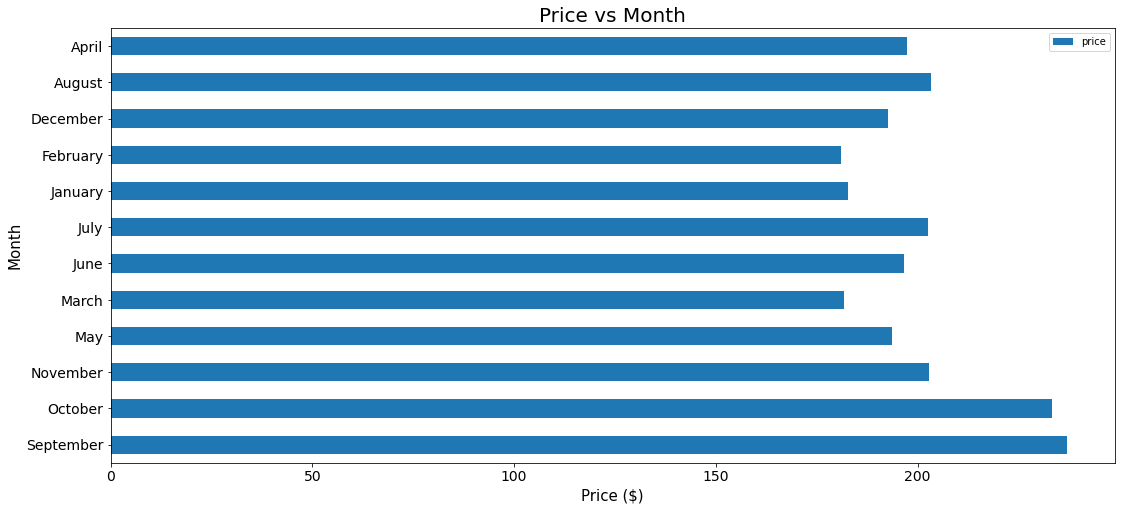

In [137]:
# plot bar Price vs Month
date_month_mean.plot(kind = 'barh' , fontsize = 14, figsize=(18,8));
plt.title('Price vs Month', fontsize = 20)
plt.xlabel('Price ($)', fontsize = 15)
plt.ylabel('Month', fontsize = 15)
plt.savefig('price_month.png')

* We see a sudden surge in the prices of the property during September and October, the average difference is around 50 - 70 dollars. The reason can certainly be due to the off season.

### 5.7 What are the factors that relates to price of the property ?

##### Almost all the wrangling process has been done so its time to proceed to building the predictive model to predict the price with all the correlating variables.


In [138]:
# Since the model only accepts numeric data we need to manipulate the objet data type variables.
# check object type variables 
df_final.select_dtypes(include=['object']).columns

Index(['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'], dtype='object')

In [139]:
# copy data frame
df_pred = df_final.copy()

In [140]:
# drop object data type variables
df_pred.drop(df_final.select_dtypes(include=['object']).columns.tolist(), axis = 1, inplace = True)

In [141]:
# drop low correlation columns
df_pred.drop(['host_acceptance_rate','minimum_nights','maximum_nights','instant_bookable','reviews_per_month','amenities_parking','amenities_breakfast'], axis = 1, inplace = True)

In [142]:
# Create variable X and y for training
y = df_pred['avg_price']
X = df_pred.drop(['avg_price'], axis = 1)

In [143]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=62)

In [144]:
# check shape of the train data set
print(X_train.shape, y_train.shape)

(1661, 73) (1661,)


In [145]:
# check shape of the test data set
print(X_test.shape, y_test.shape)

(713, 73) (713,)


In [146]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))
print(median_absolute_error(y_test, y_test_preds))

0.6827620941921901
5668.365135998994
25.633799999999866


In [147]:
coeff_dataframe = pd.DataFrame()

coeff_dataframe['est_int'] = X_train.columns
coeff_dataframe['coeff'] = ForestRegressor.feature_importances_
coeff_dataframe.sort_values('coeff', ascending=False).head(20)

,est_int,coeff
13,room_type_entire_home_apt,0.331683
5,bathrooms,0.170474
71,compound_mean,0.061998
7,cleaning_fee,0.053411
4,accommodates,0.043963
10,availability_30,0.040019
72,booking_count,0.035218
6,security_deposit,0.033087
1,host_listings_count,0.032625
12,review_scores_rating,0.024814
